In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from scipy.stats import linregress


In [2]:
data = np.genfromtxt('data.txt', dtype ='str')

In [3]:
change = data[:,5].astype(int)

In [4]:
dates = data[:,1].astype(int)
months = data[:,2]
years = data[:,3].astype(int)

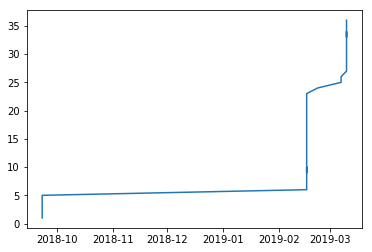

In [5]:
dts = []

for i in range(len(change)):
    date = datetime.datetime.strptime(str(dates[i])+' '+str(months[i])+' '+str(years[i]), '%d %B %Y')
    dts.append(date)

cum = np.zeros(len(change))
for i in range(len(change)):
    cum[i] = cum[i-1]+change[i]


dts = dts[::-1]
plt.plot(dts,cum)

base = dts[0]

dts2 = [(dts[i]-base).days for i in range(len(dts))]

slope, intercept, r_value, p_value, std_err = linregress(dts2, cum)

2025-03-23 08:17:04.662202


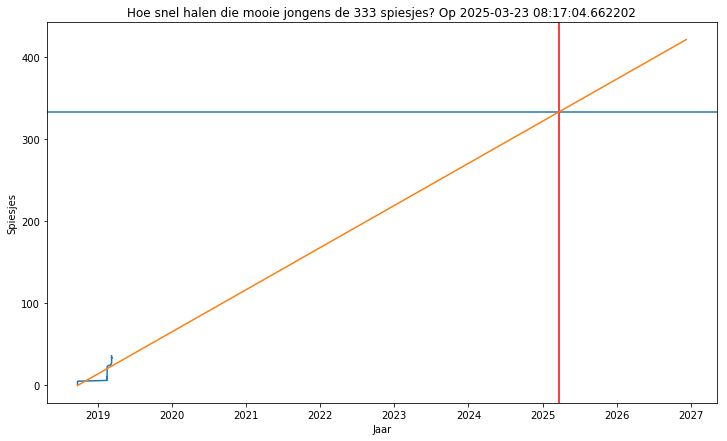

In [7]:
n = 3000
xarray = np.linspace(0,n,n)

target = 333

datesarr = np.array([base+datetime.timedelta(days=i) for i in range(n)])
yvals = slope*xarray+intercept

final = (target-intercept)/slope
finaltime = datetime.timedelta(final)
finaldate = base+finaltime
print(finaldate)

plt.figure(figsize=(12,7))
plt.axvline(x=finaldate, color='r')
plt.axhline(y=target)
plt.plot(dts,cum)
plt.plot(datesarr, yvals)
plt.xlabel('Jaar')
plt.ylabel('Spiesjes')
plt.title('Hoe snel halen die mooie jongens de 333 spiesjes? Op {}'.format(finaldate))
plt.savefig('Spiesjes.png')


